In [1]:
import time

In [15]:
# Check Pytorch installation
import torch, torchvision
print('torch version:', torch.__version__, torch.cuda.is_available())
print('torchvision version:', torchvision.__version__)

# Check MMPose installation
import mmpose
print('mmpose version:', mmpose.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('cuda version:', get_compiling_cuda_version())
print('compiler information:', get_compiler_version())

torch version: 1.10.0 True
torchvision version: 0.11.0
mmpose version: 0.24.0
cuda version: 10.2
compiler information: GCC 7.3


# Inference with an MMPose model

In [11]:
import cv2
from mmpose.apis import (inference_top_down_pose_model, init_pose_model,
                         vis_pose_result, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector
local_runtime = False

import time


try:
  from google.colab.patches import cv2_imshow  # for image visualization in colab
except:
  local_runtime = True

In [12]:
pose_config = 'configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py'
pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth'
det_config = 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py'
det_checkpoint = 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# initialize pose model
pose_model = init_pose_model(pose_config, pose_checkpoint)
# initialize detector
det_model = init_detector(det_config, det_checkpoint)

img = 'data/sample1/00268.jpg'
# img = 'data/sample2/00628.jpg'

# inference detection
mmdet_results = inference_detector(det_model, img)

# extract person (COCO_ID=1) bounding boxes from the detection results
person_results = process_mmdet_results(mmdet_results, cat_id=1)
print(f'person_results:{len(person_results)}')
# inference pose
start = time.clock() #推理计时开始
pose_results, returned_outputs = inference_top_down_pose_model(pose_model,
                                                               img,
                                                               person_results,
                                                               bbox_thr=0.3,
                                                               format='xyxy',
                                                               dataset=pose_model.cfg.data.test.type)
end = time.clock()  #计时结束
print('infer_time:', end-start)
'''
返回6个bbox, 在每个bbox里进行人体姿态估计。
目标检测中, bbox的格式是 (5, ) 前四个是检测框的位置坐标, 第五个是score
关键点检测, pose的格式是 (17,3) 表示检测17个关键点
'''



load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth
load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
person_results:29


/home/cxy/anaconda3/envs/open-mmlab/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


infer_time: 3.094094999999996


/home/cxy/anaconda3/envs/open-mmlab/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


'\n返回6个bbox, 在每个bbox里进行人体姿态估计。\n目标检测中, bbox的格式是 (5, ) 前四个是检测框的位置坐标, 第五个是score\n关键点检测, pose的格式是 (17,3) 表示检测17个关键点\n'

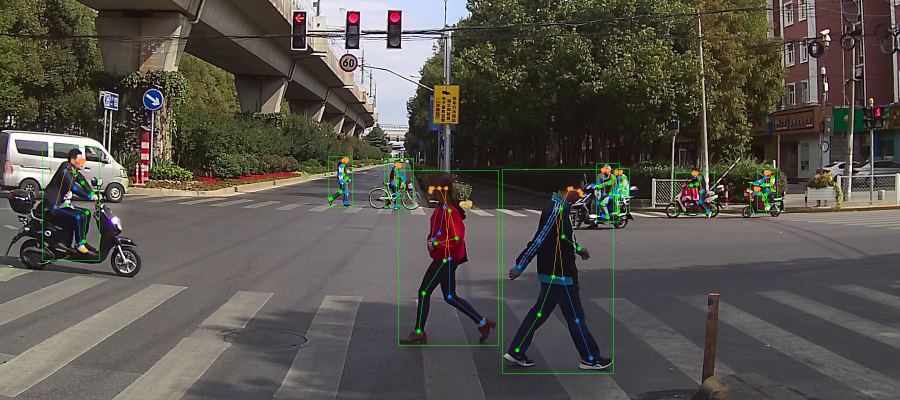

In [13]:
# show pose estimation results
vis_result = vis_pose_result(pose_model,
                             img,
                             pose_results,
                             dataset=pose_model.cfg.data.test.type,
                             show=False)
# reduce image size
vis_result = cv2.resize(vis_result, dsize=None, fx=0.5, fy=0.5)
if local_runtime:
  from IPython.display import Image, display
  import tempfile
  import os.path as osp
  with tempfile.TemporaryDirectory() as tmpdir:
    file_name = os.path.join(tmpdir, 'pose_results.png')
    cv2.imwrite(file_name, vis_result)
    display(Image(file_name))
else:
  cv2_imshow(vis_result)

In [25]:
print(f'pose_results:{len(pose_results)}')
# print(pose_results[0])
print(pose_results[0].keys())  # dict_keys(['bbox', 'keypoints'])
print(f"keypoint shape:\n {pose_results[0]['keypoints'].shape}")  # (17, 3)
print(f"keypoint[0]:\n{pose_results[0]['keypoints']}") 

print(pose_results[0]['bbox'].shape) # (5,)
print(pose_results[0]['bbox'])


pose_results:6
dict_keys(['bbox', 'keypoints'])
keypoint shape:
 (17, 3)
keypoint[0]:
[[1.2047399e+03 3.4129761e+02 9.3820238e-01]
 [1.2064095e+03 3.3962796e+02 9.2107868e-01]
 [1.2022355e+03 3.3962796e+02 9.3528616e-01]
 [1.2080792e+03 3.4129761e+02 8.8535523e-01]
 [1.1988961e+03 3.4046280e+02 9.0903318e-01]
 [1.2105836e+03 3.5131546e+02 9.0444201e-01]
 [1.1938872e+03 3.5131546e+02 8.9748669e-01]
 [1.2147578e+03 3.6467261e+02 7.9820186e-01]
 [1.1905480e+03 3.6467261e+02 8.3783734e-01]
 [1.2147578e+03 3.7552527e+02 4.4090268e-01]
 [1.1905480e+03 3.7719492e+02 8.0893040e-01]
 [1.2080792e+03 3.7469046e+02 7.6902837e-01]
 [1.1980614e+03 3.7469046e+02 7.6332015e-01]
 [1.2097489e+03 3.9305652e+02 7.6119500e-01]
 [1.1997310e+03 3.9305652e+02 7.9217470e-01]
 [1.2122533e+03 4.1058777e+02 7.8229702e-01]
 [1.2005658e+03 4.0975296e+02 7.5000274e-01]]
(5,)
[1.1867949e+03 3.3069540e+02 1.2208502e+03 4.1518109e+02 9.9305987e-01]


In [4]:
pwd

'/data/cxy/mmpose'


[code](https://colab.research.google.com/github/open-mmlab/mmpose/blob/master/demo/MMPose_Tutorial.ipynb#scrollTo=AaUNCi28zw0z)

test dataset

In [1]:
import cv2
import matplotlib.pyplot as plt


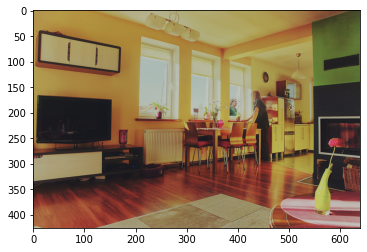

(426, 640, 3)


In [7]:
imgdir = 'data/coco/val2017/000000000139.jpg'
testimg = cv2.imread(imgdir)

b,g,r = cv2.split(testimg)
imgrgb = cv2.merge([r,g,b])

plt.figure()
plt.imshow(imgrgb)
plt.show()
print(imgrgb.shape)


In [28]:
import torch

d = torch.load('checkpoints/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth')
print(d.keys())
print(d['meta'].keys())
print(d['meta']['mmpose_version'])
# print(d['state_dict'].keys())




dict_keys(['meta', 'state_dict'])
dict_keys(['mmpose_version', 'config', 'epoch', 'iter', 'mmcv_version', 'time'])
0.1.0+4b6677f
